# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [84]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [86]:
# Import essential libraries
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D,BatchNormalization

from sklearn.preprocessing import LabelEncoder

import os
import matplotlib.pyplot as plt
%matplotlib inline

import zipfile

Load the dataset.

In [89]:
# Load and unzip the dataset
zip_path = 'data.zip'
extract_dir ='./'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
print("Data extracted to:", extract_dir)

Data extracted to: ./


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [94]:
# Create a function to load the raw images

def load_raw_image(data_dir):
    dataset = tf.keras.utils.image_dataset_from_directory(
        data_dir,
        labels='inferred',            # subdirectory names as labels
        label_mode='int',             # Labels as integer indices
        shuffle=True,                 
        seed=56                       
    )
    return dataset

#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [99]:
# Get the images and their labels

ImageDataSet = load_raw_image('data/')

Found 7625 files belonging to 7 classes.


In [100]:
# Labels
class_names = ImageDataSet.class_names
print(class_names)

['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']


In [103]:
print(ImageDataSet)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

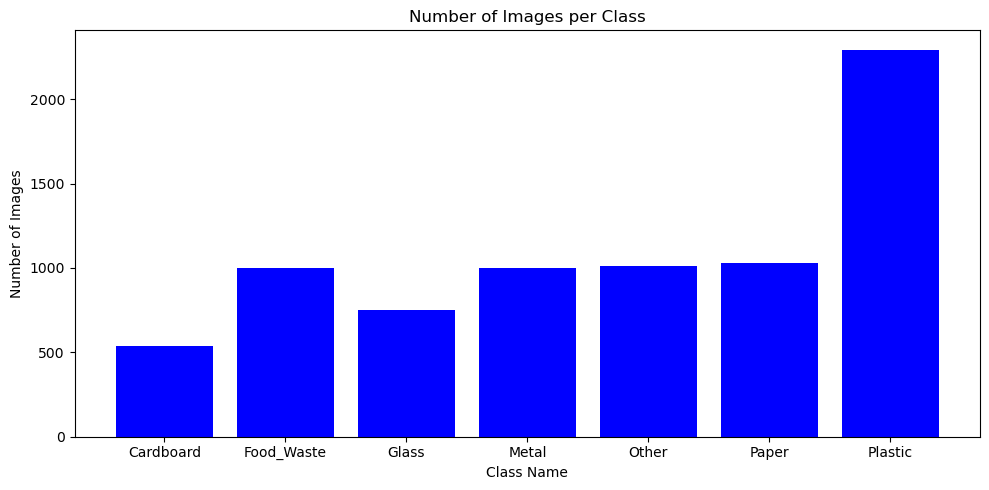

In [108]:
# Get Nuber of files from each subdirectory i.e. images present in each labels, class_name 
# Initialize an count array of zeros for each class
counts = np.zeros(len(class_names), dtype=int)

# Loop through the ImageDataSet and count labels
for _, labels in ImageDataSet:
    labels = labels.numpy()
    for i in labels:
        counts[i] += 1

# Plot the bar chart
plt.figure(figsize=(10, 5))
plt.bar(class_names, counts, color='blue')
plt.xlabel("Class Name")
plt.ylabel("Number of Images")
plt.title("Number of Images per Class")
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

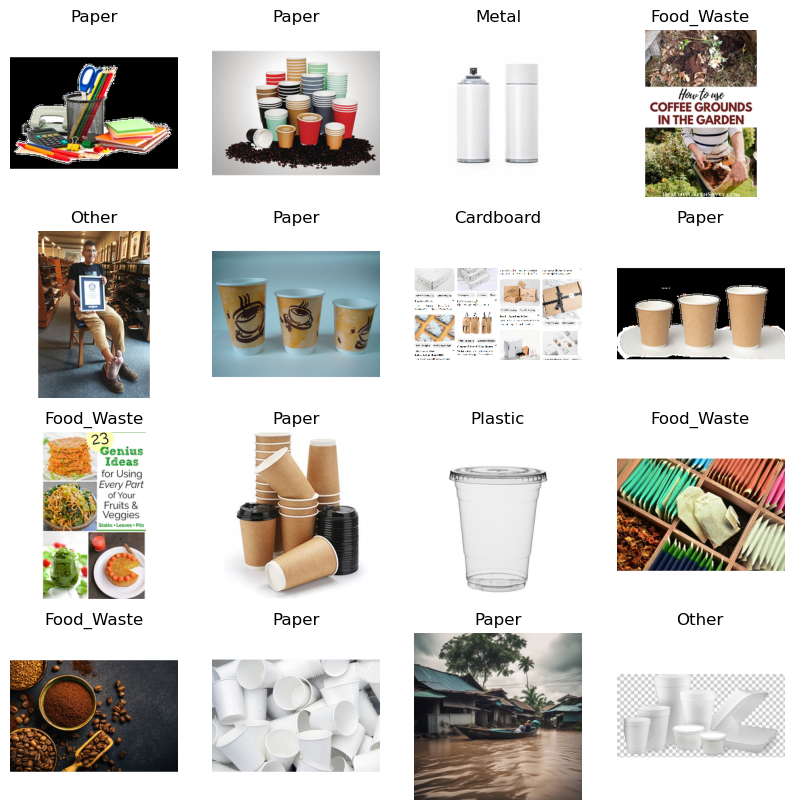

In [110]:
# Visualise Sample Images (across different labels)

class_names = ImageDataSet.class_names

def show_few_images(dset, class_names):
    plt.figure(figsize=(10, 10))
    for images, labels in dset.take(1):  
        for i in range(16):
            plt.subplot(4, 4, i + 1)
            plt.imshow(images[i].numpy().astype("int"))
            plt.title(class_names[labels[i]])
            plt.axis("off")

show_few_images(ImageDataSet, class_names)

#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [114]:
# Find the smallest and largest image dimensions from the data set

min_height, min_width = 999999, 999999
max_height, max_width = 0, 0

for images, _ in ImageDataSet:
    for img in images:
        height, width = img.shape[0], img.shape[1]

        if height < min_height:
            min_height = height
        if width < min_width:
            min_width = width

        if height > max_height:
            max_height = height
        if width > max_width:
            max_width = width

print(f"Smallest image size: {min_height} x {min_width}")
print(f"Largest image size: {max_height} x {max_width}")


Smallest image size: 256 x 256
Largest image size: 256 x 256


In [115]:
# Resize the image dimensions
# Smallest and Largest image size are same 256 x 256 


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [119]:
type(class_names)

list

In [120]:
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(class_names)

print(class_names)
print(encoded_labels)

['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']
[0 1 2 3 4 5 6]


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [127]:
# Assign specified parts of the dataset to train and validation sets

# Get total number of batches
total_batches = tf.data.experimental.cardinality(ImageDataSet).numpy()

# Define 80-20 train-validation split
train_size = int(0.8 * total_batches)

# Split the dataset
train_ds = ImageDataSet.take(train_size)
val_ds = ImageDataSet.skip(train_size)

In [129]:
for images, labels in ImageDataSet.take(1):
    print("Image batch shape:", images.shape)
    print("Label batch shape:", labels.shape)

Image batch shape: (32, 256, 256, 3)
Label batch shape: (32,)


In [131]:
train_sample_count = sum([images.shape[0] for images, _ in train_ds])
val_sample_count = sum([images.shape[0] for images, _ in val_ds])
print(train_sample_count)
print(val_sample_count)

6112
1513


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [136]:
def preprocess_data(dataset):
    return dataset.map(lambda x, y: (tf.image.resize(x, (128, 128)) / 255.0, y))

train_ds = preprocess_data(train_ds)
val_ds = preprocess_data(val_ds)

In [140]:
# Build and compile the model
# Assuming input shape (128, 128, 3) for RGB images (adjust according to your dataset)

model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolutional Layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolutional Layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization

# Output layer 
num_classes = len(class_names)
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' for one-hot labels
              metrics=['accuracy'])

# Print the model summary
model.summary()


C:\Users\Sushant\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,943,303 (49.37 MB)

 Trainable params: 12,942,855 (49.37 MB)

 Non-trainable params: 448 (1.75 KB)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [144]:
# Training
model.fit(
    train_ds,                     # Input data
    epochs=10,                     # Number of epochs
    steps_per_epoch=len(train_ds), # Number of batches per epoch
    verbose=1,                      # Verbose output for progress
    validation_data=(val_ds)
)

Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 67s 341ms/step - accuracy: 0.2749 - loss: 3.7081 - val_accuracy: 0.1619 - val_loss: 4.2945
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 66s 345ms/step - accuracy: 0.3905 - loss: 1.6164 - val_accuracy: 0.2459 - val_loss: 3.4441
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 68s 354ms/step - accuracy: 0.4232 - loss: 1.5486 - val_accuracy: 0.3648 - val_loss: 2.1301
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 68s 355ms/step - accuracy: 0.4540 - loss: 1.4534 - val_accuracy: 0.3781 - val_loss: 1.9910
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 67s 352ms/step - accuracy: 0.4989 - loss: 1.3674 - val_accuracy: 0.4389 - val_loss: 1.7553
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 68s 353ms/step - accuracy: 0.5350 - loss: 1.2884 - val_accuracy: 0.4686 - val_loss: 1.5947
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 68s 354ms/step - accuracy: 0.5610 - loss: 1.2357 - val_accuracy: 0.3847 - val_loss: 2.1105
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 68s 355ms/step - accuracy: 0.5903 - loss: 1

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [146]:
# Evaluate on the test set; display suitable metrics
model.evaluate(val_ds)

48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.4548 - loss: 1.5100


[1.5436373949050903, 0.4586913287639618]

In [148]:
print(model.metrics_names)

['loss', 'compile_metrics']


## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [ ]:
# Define augmentation steps to augment images



Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [ ]:
# Create a function to augment the images




In [ ]:
# Create the augmented training dataset



##### **4.1.2**

Train the model on the new augmented dataset.

In [150]:
# Train the model using augmented images



## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
  #### Image Data categoried into 7 class  'Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper' and 'Plastic'
  #### Min and Max size of Image is 256 x 256
  #### There are 7625 image belonging to 7 classes
  #### Model 3 convolutional layers. Added Batch normalisation, Max pooling, dropout and fully connected layers to the model.
  #### Input and Hidden layer Activation function - relu
  #### Output layer Activation function - softmax
* Report model training results
  ### Traning accuracy: 62.79%
  ### Validation accuracy: 45.86%  - val_loss: 1.5449